### Before reading the following notebook, please run all the cells so that the Merkdown sections display the results that are connected to the previous code fragments.

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. <br> The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability.

That is the quantile function role and the exercise goal will be to find it. 

(In probability and statistics, the quantile function, associated with a probability distribution of a random variable, specifies the value of the random variable such that the probability of the variable being less than or equal to that value equals the given probability.)

In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. 
The latter describes the probability distribution of an annual maxima.

In the exercise, the cumulative probability $p_i$ for a given year i is defined as: 

$$p_i = \frac{i}{(N+1)}$$

with $N = 21$, the number of measured years.

Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. <br> Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



The value of storm wind speed occurring every 50 years: 32.98 m/s


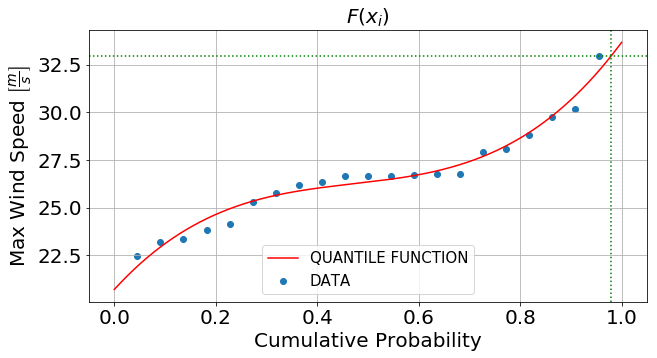

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import *
from scipy.interpolate import UnivariateSpline

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
N = years_nb
cprob = np.array([float(i)/float(N+1) for i in range(1,N+1)])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sort = np.sort(max_speeds)
fifty_prob = 1. - 0.02
quantile_func = UnivariateSpline(cprob, sort)
fifty_wind = quantile_func(fifty_prob)
ax.plot(np.linspace(0,1,1000),  quantile_func(np.linspace(0,1,1000)),color = 'r',
        label="QUANTILE FUNCTION")
ax.scatter(cprob,sort, label="DATA")
ax.set_ylabel(r"Max Wind Speed $\left[\frac{m}{s}\right]$",fontsize=20)
ax.set_xlabel(r"Cumulative Probability",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title("$F(x_{i})$",fontsize=20)
ax.axvline(fifty_prob,linestyle=':',color='g')
ax.axhline(fifty_wind,linestyle=':',color='g')
ax.grid()
ax.legend(fontsize=15)
print "The value of storm wind speed occurring every 50 years:", round(quantile_func(fifty_prob),3), "m/s"

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.

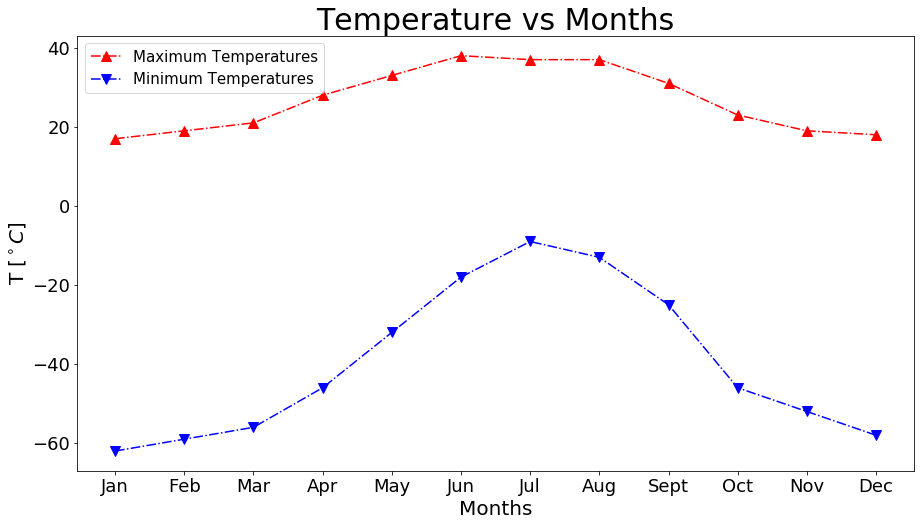

In [19]:
import scipy.optimize as opt
from matplotlib import pyplot as plt

max_t = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months0 = ['Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug','Sept', 'Oct', 'Nov', 'Dec']
months1 = np.arange(12)+1
plt.figure(figsize=(15, 8))
plt.plot(months0,  max_t,color = 'r',linestyle='-.',marker='^',markersize=10,label="Maximum Temperatures")
plt.plot(months0,  min_t,color = 'b',linestyle='-.',marker="v",markersize=10,label="Minimum Temperatures")
plt.xlabel("Months",fontsize=20)
plt.tick_params(labelsize=18)
plt.title("Temperature vs Months",fontsize=30)
plt.ylabel("T $[^\\circ C]$",fontsize=20)
plt.legend(fontsize=15,loc="best")
plt.show()

* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?

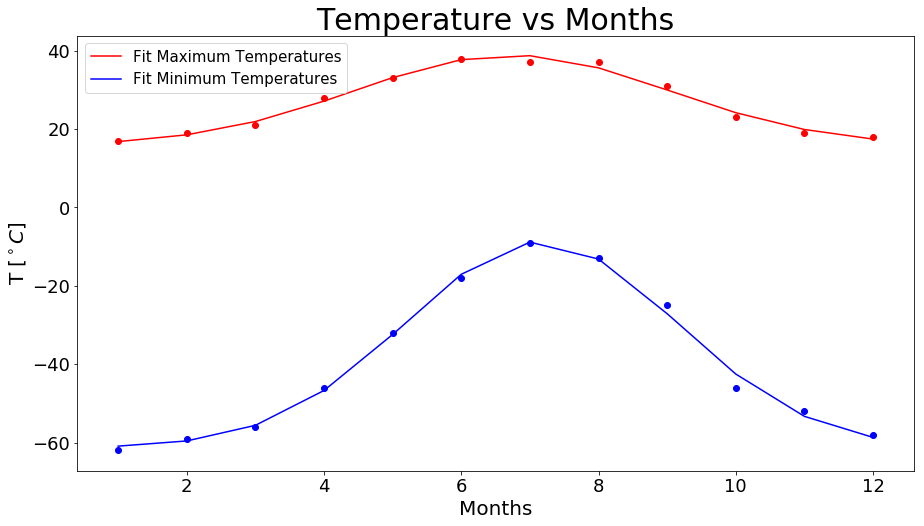

In [20]:
def gaus(x,x1,x2,x3,x4):
    return x1*np.exp(-(x-x2)**2/(2*x3**2))+x4

parametersmax,covariancemax = opt.curve_fit(gaus,months1,max_t)
parametersmin,covariancemin = opt.curve_fit(gaus,months1,min_t)
fig, ax = plt.subplots(1,1,figsize=(15, 8))

ax.plot(months1,gaus(months1, parametersmax[0],parametersmax[1], parametersmax[2],parametersmax[3]), color='r',label="Fit Maximum Temperatures")
ax.scatter(months1,max_t,color='r')
ax.scatter(months1,min_t,color='b')
ax.plot(months1,gaus(months1, parametersmin[0],parametersmin[1], parametersmin[2],parametersmin[3]),color='b',label="Fit Minimum Temperatures")
plt.xlabel("Months",fontsize=20)
plt.tick_params(labelsize=18)
plt.title("Temperature vs Months",fontsize=30)
ax.set_ylabel("T $[^\\circ C]$",fontsize=20)
ax.legend(fontsize=15)
plt.show()

<font color='green'>
It was decided to try to fit the data by choosing the Gaussian as a fit function:

$$f(x \mid  A, \mu, \sigma, b ) = A \, e^{ \frac{(x - \mu)^2}{2 \sigma^2} }+b $$

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
##### Results 
Fit parameters: <br> $A_{T_{max}}$ = {{round(parametersmax[0],3)}} &nbsp; $\mu_{T_{max}}$ = {{round(parametersmax[1],3)}} &nbsp; $\sigma_{T_{max}}$ = {{round(parametersmax[2],3)}} &nbsp; $b_{T_{max}}$ = {{round(parametersmax[3],3)}}<br>
$A_{T_{min}}$ = {{round(parametersmin[0],3)}} &nbsp; $\mu_{T_{min}}$ = {{round(parametersmin[1],3)}} &nbsp; $\sigma_{T_{min}}$ = {{round(parametersmin[2],3)}} &nbsp; $b_{T_{min}}$ = {{round(parametersmin[3],3)}}

</font>

* Is the time offset for min and max temperatures the same within the fit accuracy?

In [21]:
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(parametersmax[1],parametersmax[2],len(max_t),parametersmin[1],parametersmin[2],len(min_t))

Ttest_indResult(statistic=-0.4904598676970357, pvalue=0.6286646362353486)

<font color='green'>
Statistical significance. <br>
$α=0.05$ <br>
$H_{0} :$ &nbsp;&nbsp; $\mu_{T_{min}}$ and  $\mu_{T_{max}}$ differ from each other due to statistical fluctuations.
<br>
<br>
Being that p > α there are no reasons to reject the null hypothesis.
</font>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


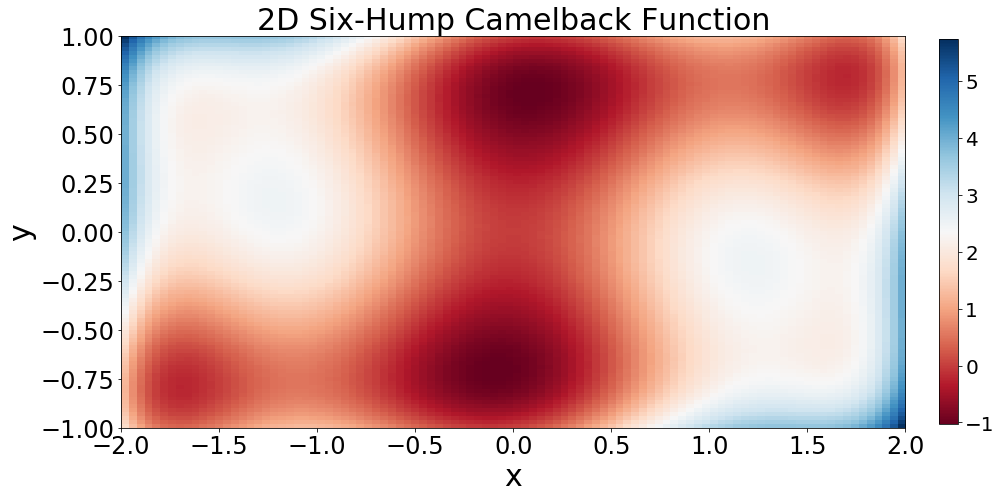

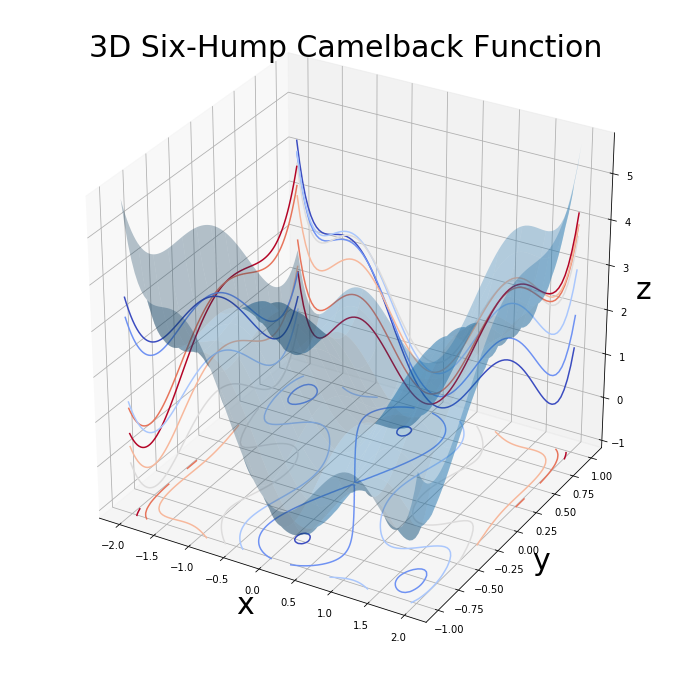

In [22]:
def func1(x0,x1):
    return (4-2.1*x0**2+(x0**4)/3.0)*x0**2 + x0*x1 + 4*(x1**2-1)*x1**2
def func2(x):
    x1 = x[0]
    x2 = x[1]
    return  (4 - 2.1*(x1**2) + (x1**4)/3.0)*(x1**2) + x1*x2 + 4*(-1 +(x2**2))*x2**2

from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pylab as pl
import pylab

from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 15))
x,y = np.linspace(-2,2,100),np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)
Z = func1(X,Y)
a=ax.imshow(np.array(Z), extent=[-2,2,-1,1], cmap='RdBu')
cbar = fig.colorbar(a,fraction=0.023, pad=0.04)
cbar.ax.tick_params(labelsize=20) 
ax.set_xlabel('x',fontsize=30)
ax.set_ylabel('y',fontsize=30)
ax.set_title('2D Six-Hump Camelback Function',fontsize=30)
ax.tick_params(labelsize=24)

fig = plt.figure(figsize=[12, 12])
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
ax.set_title('3D Six-Hump Camelback Function',fontsize=30)
ax.set_xlabel('x',fontsize=30)
ax.set_ylabel('y',fontsize=30)
ax.set_zlabel('z',fontsize=30)
cset = ax.contour(X, Y, Z, zdir='z', offset=-1.2, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-2, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=1, cmap=cm.coolwarm)

<font color='green'>
    
[Online](https://www.sfu.ca/~ssurjano/camel6.html) you can find that the solutions are: <br>
$f(\mathbf{x})=-1.0316$ &emsp; at $\mathbf{x}=(0.0898,-0.7126)$ and $(-0.0898,0.7126)$ &emsp;&emsp;&emsp;&emsp; $x_{1},x_{2} \in (-2,2) \times (-1,1)$ 
    
</font>

In [23]:
%precision 4
bounds = [(-1, 1)]
res = minimize(func2,bounds)
print "Value of the function : ", res.fun,"\n"
print "Value of the unputs : ", res.x

Value of the function :  -1.03162845349 

Value of the unputs :  [-0.0898  0.7127]


<font color='green'>
    
The function is even considering both variables, so also the point with both components of opposite sign is solution.
</font>

In [24]:
bounds = [(0, 0)]
res = minimize(func2,bounds)
print "Value of the function : ", res.fun,"\n"
print "Value of the unputs : ", res.x

Value of the function :  0.0 

Value of the unputs :  [0. 0.]


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

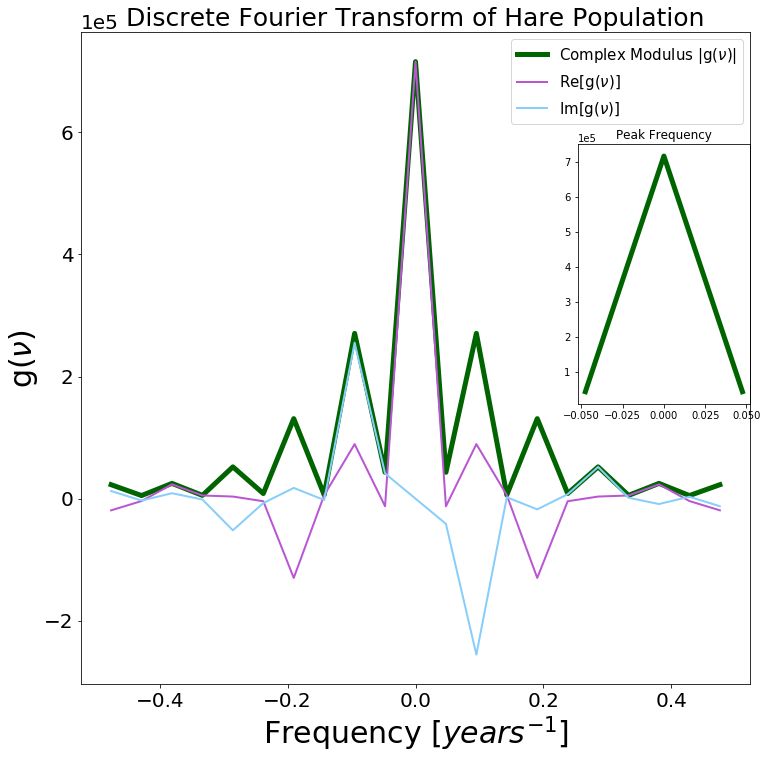

In [25]:
from scipy.fftpack import fft, fftfreq,ifft
# ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
pd.set_option('precision', 1)
datamatrix = pd.read_csv('populations.txt',delimiter='\t')

hare_ft = fft(datamatrix['hare'])
power0 = np.abs(hare_ft)
lynx_ft = fft(datamatrix['lynx'])
power1 = np.abs(lynx_ft)
carrot_ft = fft(datamatrix['carrot'])
power2 = np.abs(carrot_ft)

sample_freq = fftfreq(datamatrix['# year'].size)

pos_mask = np.where(abs(sample_freq) < 0.07)
freqs = sample_freq[pos_mask]
power01 = power0[pos_mask]
power01=np.roll(power01,1)
freqs=np.roll(freqs,1)

shift= sum(1 for i in sample_freq if i < 0)
power0=np.roll(power0,shift)
sample_freq=np.roll(sample_freq,shift)
hare_ft=np.roll(hare_ft,shift)

fig,ax= plt.subplots(1,1, figsize=(12,12))
ax.plot(sample_freq,power0,c="darkgreen",linewidth=5.0,label=r"Complex Modulus |g($ \nu $)|")
ax.plot(sample_freq,hare_ft.real,c="mediumorchid",linewidth=2.0,label=r"Re[g($ \nu $)]")
ax.plot(sample_freq,hare_ft.imag,c="lightskyblue",linewidth=2.0,label=r"Im[g($ \nu $)]")
ax.set_xlabel(r'Frequency $[years^{-1}]$',fontsize=30)
ax.set_ylabel(r"g($ \nu $)",fontsize=30)
ax.set_title('Discrete Fourier Transform of Hare Population',fontsize=25)
ax.tick_params(labelsize=20)
ax.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
ax.yaxis.offsetText.set_fontsize(20)
ax.legend(fontsize=15)
axes = plt.axes([0.70, 0.45, 0.2, 0.30]) 
plt.title('Peak Frequency')
plt.plot(freqs, power01,c="darkgreen",linewidth=5.0)
plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')

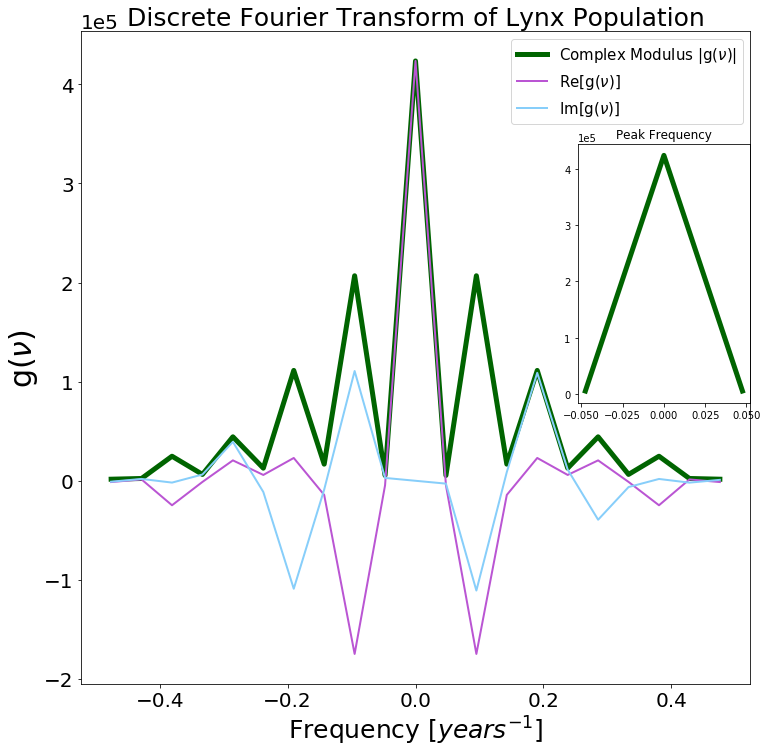

In [26]:
power11 = power1[pos_mask]
power11=np.roll(power11,1)
power1=np.roll(power1,shift)
lynx_ft=np.roll(lynx_ft,shift)


fig,ax1= plt.subplots(1,1, figsize=(12,12))
ax1.plot(sample_freq,power1,c="darkgreen",linewidth=5.0,label=r"Complex Modulus |g($ \nu $)|")
ax1.plot(sample_freq,lynx_ft.real,c="mediumorchid",linewidth=2.0,label=r"Re[g($ \nu $)]")
ax1.plot(sample_freq,lynx_ft.imag,c="lightskyblue",linewidth=2.0,label=r"Im[g($ \nu $)]")
ax1.set_xlabel(r'Frequency $[years^{-1}]$',fontsize=25)
ax1.set_ylabel(r"g($ \nu $)",fontsize=30)
ax1.set_title('Discrete Fourier Transform of Lynx Population',fontsize=25)
ax1.tick_params(labelsize=20)
ax1.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
ax1.yaxis.offsetText.set_fontsize(20)
ax1.legend(fontsize=15)
axes = plt.axes([0.70, 0.45, 0.2, 0.30]) 
plt.title('Peak Frequency')
plt.plot(freqs, power11,c="darkgreen",linewidth=5.0)
plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')

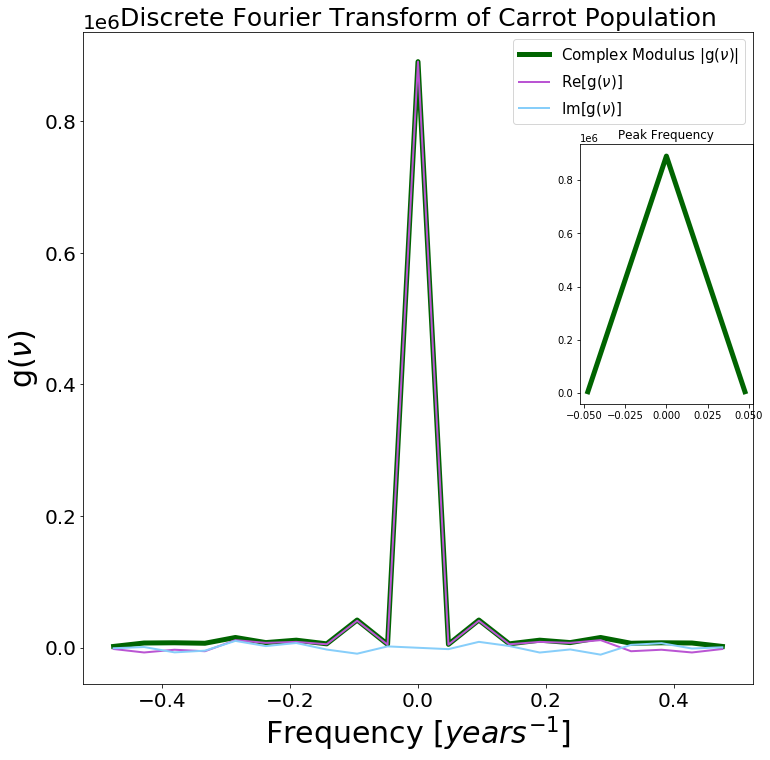

In [27]:
power21 = power2[pos_mask]
power21=np.roll(power21,1)
power2=np.roll(power2,shift)
carrot_ft=np.roll(carrot_ft,shift)


fig,ax1= plt.subplots(1,1, figsize=(12,12))
ax1.plot(sample_freq,power2,c="darkgreen",linewidth=5.0,label=r"Complex Modulus |g($ \nu $)|")
ax1.plot(sample_freq,carrot_ft.real,c="mediumorchid",linewidth=2.0,label=r"Re[g($ \nu $)]")
ax1.plot(sample_freq,carrot_ft.imag,c="lightskyblue",linewidth=2.0,label=r"Im[g($ \nu $)]")
ax1.set_xlabel(r'Frequency $[years^{-1}]$',fontsize=30)
ax1.set_ylabel(r"g($ \nu $)",fontsize=30)
ax1.set_title('Discrete Fourier Transform of Carrot Population',fontsize=25)
ax1.tick_params(labelsize=20)
ax1.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')
ax1.yaxis.offsetText.set_fontsize(20)
ax1.legend(fontsize=15)
axes = plt.axes([0.70, 0.45, 0.2, 0.30]) 
plt.title('Peak Frequency')
plt.plot(freqs, power21,c="darkgreen",linewidth=5.0)
plt.ticklabel_format(style='sci',scilimits=(-3,3),axis='y')

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

(-0.5, 629.5, 473.5, -0.5)

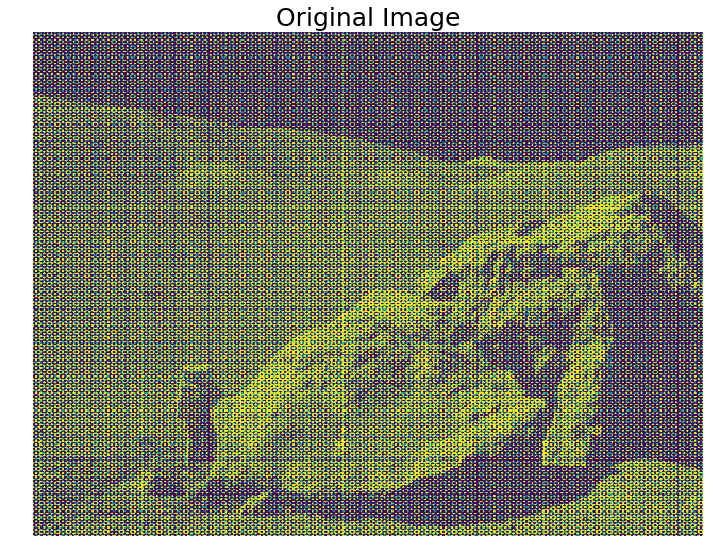

In [28]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a
    
from scipy.fftpack import fft2,ifft2
import pylab as pyl
img = pyl.imread('moonlanding.png')
img=totuple(img)
fig,ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(img)
plt.title('Original Image',fontsize=25)
plt.axis('off')

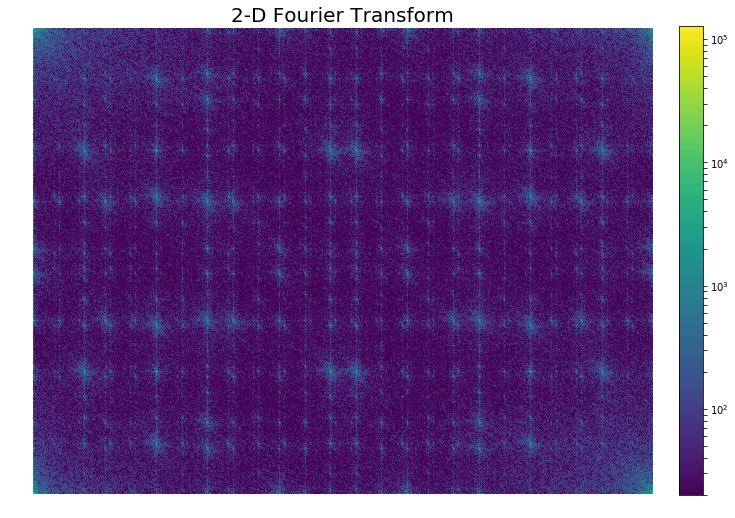

In [29]:
from matplotlib.colors import LogNorm
img_fft = fft2(totuple(img)) 
fig,ax = plt.subplots(1, 1, figsize=(12, 12))
img_fft2_col=plt.imshow(np.abs(img_fft), norm=LogNorm(vmin=20)) 
plt.title("2-D Fourier Transform",fontsize=20)
plt.axis('off')
plt.colorbar(img_fft2_col,fraction=0.035, pad=0.04) 

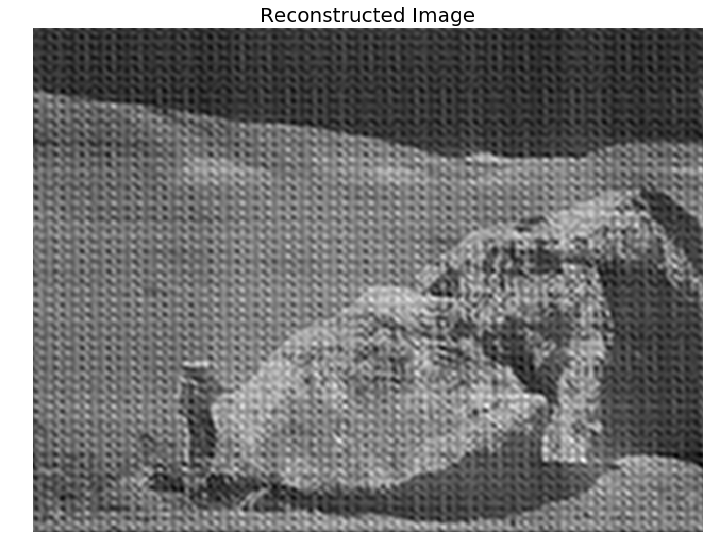

In [30]:
perccoeff = 0.15
fft2 = img_fft.copy() 
r, c = fft2.shape 
fft2[int(r*perccoeff):int(r*(1-perccoeff))] = 0 
fft2[:, int(c*perccoeff):int(c*(1-perccoeff))] = 0 
fft2[int(r*(1-perccoeff)):r,int(c*(1-perccoeff)):c] = 0 
fig,ax = plt.subplots(1, 1, figsize=(12, 12))
im_new = ifft2(fft2).real 
plt.title('Reconstructed Image',fontsize=20)
plt.axis('off')
plt.imshow(im_new, plt.cm.gray)